# Dataframe catchments

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sbn

import warnings
warnings.filterwarnings('ignore')

In [2]:
cluster=gpd.read_file("../Data/catchments_OK.gpkg")
cluster.tail(1)

,Nombre,ID_CUENCA,cuenca,area,geometry
642,Quebrada La Paja,651.0,Cauca,329202581,"MULTIPOLYGON (((423759.438 739547.404, 423787...."


In [3]:
cat=gpd.read_file("../Data/subbasins_Ks_zonalStatistic.gpkg")
cat.tail(1)

,OBJECTID,Id,gridcode,Área,Nombre,ID_CUENCA,hypso_inte,area_curva,Knickpoint,_Kscount,_Ksmean,_Ksmedian,_Ksstdev,_Ksmin,_Ksmax,_Ksrange,geometry
651,664,651.0,1.0,328.97443,Quebrada La Paja,651,0.336,0.32287,D,4609.0,33.448628,23.666,32.850318,0.006619,196.75,196.743381,"MULTIPOLYGON (((423759.438 739547.404, 423787...."


In [4]:
cat_1 = cluster.merge(cat[["ID_CUENCA","hypso_inte","_Ksmean"]], on='ID_CUENCA')
cat_1.tail(1)

,Nombre,ID_CUENCA,cuenca,area,geometry,hypso_inte,_Ksmean
642,Quebrada La Paja,651.0,Cauca,329202581,"MULTIPOLYGON (((423759.438 739547.404, 423787....",0.336,33.448628


In [5]:
chi_cat=gpd.read_file("../Data/subbasins_chi_zonalStatistic.gpkg")
chi_cat.head(1)

,OBJECTID,Id,gridcode,Área,Nombre,ID_CUENCA,hypso_inte,area_curva,Knickpoint,_chicount,_chimean,_chimedian,_chistdev,_chimin,_chimax,geometry
0,1,0.0,2827.0,120.181924,Quebrada Los San Andreses,0,0.107,0.096501,A,1362.0,10.017347,10.076,2.848651,4.6349,16.011,"MULTIPOLYGON (((411860.438 900002.542, 411964...."


In [6]:
cat_2 = cat_1.merge(chi_cat[["ID_CUENCA","_chimean"]], on='ID_CUENCA')
cat_2.tail(1)

,Nombre,ID_CUENCA,cuenca,area,geometry,hypso_inte,_Ksmean,_chimean
642,Quebrada La Paja,651.0,Cauca,329202581,"MULTIPOLYGON (((423759.438 739547.404, 423787....",0.336,33.448628,22.987495


In [7]:
cat_lin=gpd.read_file("../Data/hypso3.gpkg")
cat_lin.reset_index(inplace=True)
cat_lin.rename(columns={"index":"ID_CUENCA"}, inplace=True)
cat_lin.head(1)

,ID_CUENCA,OBJECTID,Id,gridcode,Área,hypso_inte,area_curva,Shape_Leng,Shape_Le_1,Shape_Area,Nombre,Lineamient,Densidad,_mean,knickpoint,geometry
0,0,1,4.0,2827.0,120.181924,0.107,0.096448,59628.024115,59459.370531,1.201791e+08,Quebrada Los San Andreses,294.0,2.446291,2250.332866,E,"MULTIPOLYGON (((411860.438 900002.542, 411964...."


In [8]:
cat_3 = cat_2.merge(cat_lin[["ID_CUENCA","_mean","Densidad"]], on='ID_CUENCA')
cat_3.rename(columns={"_mean":"rainfall_cat"}, inplace=True)
cat_3.tail(1)

,Nombre,ID_CUENCA,cuenca,area,geometry,hypso_inte,_Ksmean,_chimean,rainfall_cat,Densidad
642,Quebrada La Paja,651.0,Cauca,329202581,"MULTIPOLYGON (((423759.438 739547.404, 423787....",0.336,33.448628,22.987495,1618.777632,6.957988


In [9]:
cat_elev=gpd.read_file("../Data/elev_zonal_statistic.gpkg")
cat_elev.tail(1)

,Área,Nombre,ID_CUENCA,elev_mean,elev_median,elev_min,elev_max,elev_range,geometry
651,328.97443,Quebrada La Paja,651,2634.928196,2594.0,2294.591553,3309.0,1014.408447,"MULTIPOLYGON (((423759.438 739547.404, 423787...."


In [10]:
cat_4 = cat_3.merge(cat_elev[["ID_CUENCA","elev_mean"]], on='ID_CUENCA')
cat_4.tail(1)

,Nombre,ID_CUENCA,cuenca,area,geometry,hypso_inte,_Ksmean,_chimean,rainfall_cat,Densidad,elev_mean
642,Quebrada La Paja,651.0,Cauca,329202581,"MULTIPOLYGON (((423759.438 739547.404, 423787....",0.336,33.448628,22.987495,1618.777632,6.957988,2634.928196


In [11]:
cat_slope=gpd.read_file("../Data/slope_zonal_statistic.gpkg")
cat_slope.tail(1)

,Nombre,ID_CUENCA,slope_mean,slope_median,slope_min,slope_max,slope_range,geometry
651,Quebrada La Paja,651,14.381317,13.592371,0.0,72.365318,72.365318,"MULTIPOLYGON (((423759.438 739547.404, 423787...."


In [12]:
cat_5 = cat_4.merge(cat_slope[["ID_CUENCA","slope_mean"]], on='ID_CUENCA')
cat_5.tail(1)

,Nombre,ID_CUENCA,cuenca,area,geometry,hypso_inte,_Ksmean,_chimean,rainfall_cat,Densidad,elev_mean,slope_mean
642,Quebrada La Paja,651.0,Cauca,329202581,"MULTIPOLYGON (((423759.438 739547.404, 423787....",0.336,33.448628,22.987495,1618.777632,6.957988,2634.928196,14.381317


In [13]:
cat_relief=gpd.read_file("../Data/catchments_relief.shp")
cat_relief.tail(1)

,fid,ID_CUENCA,Nombre,kmeans,tskmeans_d,tskmeans_s,knn_1,knn_2,knn_4,knn_10,hc,rel_count,rel_mean,rel_median,rel_stdev,rel_min,rel_max,rel_range,geometry
651,652.0,651.0,Quebrada La Paja,B,D,B,B,D,D,D,A,370598.0,197.551795,170.0,123.466447,0.0,969.0,969.0,"POLYGON ((423759.438 739547.404, 423787.738 73..."


In [14]:
cat_6 = cat_5.merge(cat_relief[["ID_CUENCA","rel_mean","kmeans"]], on='ID_CUENCA')
cat_6.tail(1)

,Nombre,ID_CUENCA,cuenca,area,geometry,hypso_inte,_Ksmean,_chimean,rainfall_cat,Densidad,elev_mean,slope_mean,rel_mean,kmeans
642,Quebrada La Paja,651.0,Cauca,329202581,"MULTIPOLYGON (((423759.438 739547.404, 423787....",0.336,33.448628,22.987495,1618.777632,6.957988,2634.928196,14.381317,197.551795,B


In [15]:
cat_rain=gpd.read_file("../Data/RainfallDays.gpkg")
cat_7 = cat_6.merge(cat_rain[["ID_CUENCA",'RainfallDaysmean','RainfallDaysmedian','RainfallDaysstdev','RainfallDaysmin','RainfallDaysmax']], on='ID_CUENCA')
cat_7.tail(1)

,Nombre,ID_CUENCA,cuenca,area,geometry,hypso_inte,_Ksmean,_chimean,rainfall_cat,Densidad,elev_mean,slope_mean,rel_mean,kmeans,RainfallDaysmean,RainfallDaysmedian,RainfallDaysstdev,RainfallDaysmin,RainfallDaysmax
642,Quebrada La Paja,651.0,Cauca,329202581,"MULTIPOLYGON (((423759.438 739547.404, 423787....",0.336,33.448628,22.987495,1618.777632,6.957988,2634.928196,14.381317,197.551795,B,417.0,391.0,96.975083,267.0,618.0


### Recent landslides

In [16]:
recent=gpd.read_file("../Data/recent2.gpkg")
rec=recent[["geometry","Name"]].to_crs(epsg=32618)
rec.tail(1)

,geometry,Name
13776,POINT Z (456910.258 734239.312 0.000),01/2024


In [17]:
rec_cat = gpd.sjoin(rec, cluster, how="inner")
rec_cat.tail(1)

,geometry,Name,index_right,Nombre,ID_CUENCA,cuenca,area
13765,POINT Z (459003.157 721671.364 0.000),06/2018,72,Quebrada Mocorongo,561.0,Cauca,17874362


In [18]:
rec_by_cat=rec_cat.groupby("ID_CUENCA").size()
rec_cat_df=pd.DataFrame({"lands_rec": rec_by_cat})
rec_cat_df.tail(2)

,lands_rec
ID_CUENCA,
650.0,2
651.0,46


In [19]:
cat_8 = cat_7.join(rec_cat_df,on="ID_CUENCA")
cat_8["lands_rec"]=cat_8["lands_rec"].fillna(0)
cat_8.tail(1)

,Nombre,ID_CUENCA,cuenca,area,geometry,hypso_inte,_Ksmean,_chimean,rainfall_cat,Densidad,elev_mean,slope_mean,rel_mean,kmeans,RainfallDaysmean,RainfallDaysmedian,RainfallDaysstdev,RainfallDaysmin,RainfallDaysmax,lands_rec
642,Quebrada La Paja,651.0,Cauca,329202581,"MULTIPOLYGON (((423759.438 739547.404, 423787....",0.336,33.448628,22.987495,1618.777632,6.957988,2634.928196,14.381317,197.551795,B,417.0,391.0,96.975083,267.0,618.0,46.0


### Relict landslides

In [20]:
relict=gpd.read_file("../Data/relict_rainfall.gpkg")
rel=relict[["geometry","Name"]].to_crs(epsg=32618)
rel.tail(1)

,geometry,Name
221,POINT Z (452907.806 809909.132 747.913),K206


In [21]:
rel_cat = gpd.sjoin(rel, cluster, how="inner")
rel_cat.tail(1)

,geometry,Name,index_right,Nombre,ID_CUENCA,cuenca,area
221,POINT Z (452907.806 809909.132 747.913),K206,492,Quebrada La Siberia,417.0,Cauca,118436251


In [22]:
rel_by_cat=rel_cat.groupby("ID_CUENCA").size()
rel_cat_df=pd.DataFrame({"lands_rel": rel_by_cat})
rel_cat_df.tail(1)

,lands_rel
ID_CUENCA,
651.0,1


In [23]:
cat_9 = cat_8.join(rel_cat_df,on="ID_CUENCA")
cat_9["lands_rel"]=cat_9["lands_rel"].fillna(0)
cat_9.tail(1)

,Nombre,ID_CUENCA,cuenca,area,geometry,hypso_inte,_Ksmean,_chimean,rainfall_cat,Densidad,...,slope_mean,rel_mean,kmeans,RainfallDaysmean,RainfallDaysmedian,RainfallDaysstdev,RainfallDaysmin,RainfallDaysmax,lands_rec,lands_rel
642,Quebrada La Paja,651.0,Cauca,329202581,"MULTIPOLYGON (((423759.438 739547.404, 423787....",0.336,33.448628,22.987495,1618.777632,6.957988,...,14.381317,197.551795,B,417.0,391.0,96.975083,267.0,618.0,46.0,1.0


In [24]:
cat_9["landslides"]=cat_9["lands_rec"]+cat_9["lands_rel"]
cat_9.tail(1)

,Nombre,ID_CUENCA,cuenca,area,geometry,hypso_inte,_Ksmean,_chimean,rainfall_cat,Densidad,...,rel_mean,kmeans,RainfallDaysmean,RainfallDaysmedian,RainfallDaysstdev,RainfallDaysmin,RainfallDaysmax,lands_rec,lands_rel,landslides
642,Quebrada La Paja,651.0,Cauca,329202581,"MULTIPOLYGON (((423759.438 739547.404, 423787....",0.336,33.448628,22.987495,1618.777632,6.957988,...,197.551795,B,417.0,391.0,96.975083,267.0,618.0,46.0,1.0,47.0


#### knickpoints

In [25]:
kick5=gpd.read_file("../Data/Knicpoints_100m_5000.shp")
kick5.head(1)

,id,distan,z,IXgrid,order,dz,geometry
0,1,270501.175807,2278,57808273,1,942.43607,POINT (426946.165 712026.677)


In [26]:
kick5.drop(["id","IXgrid"],axis=1,inplace=True)

In [27]:
knick_cat = gpd.sjoin(kick5, cluster, how="inner")
knick_cat.tail(1)

,distan,z,order,dz,geometry,index_right,Nombre,ID_CUENCA,cuenca,area
733,432651.707328,1598,162,101.324152,POINT (450136.677 604206.976),384,Quebrada Platanillal(Quebrada El Dividente),300.0,Cauca,100031736


In [28]:
knick_by_cat=knick_cat.groupby("ID_CUENCA").size()
knick_cat_df=pd.DataFrame({"knick": knick_by_cat})
knick_cat_df.tail(1)

,knick
ID_CUENCA,
651.0,1


In [29]:
cat_10 = cat_9.join(knick_cat_df,on="ID_CUENCA")
cat_10["knick"]=cat_10["knick"].fillna(0)

In [30]:
cat_10.head()

,Nombre,ID_CUENCA,cuenca,area,geometry,hypso_inte,_Ksmean,_chimean,rainfall_cat,Densidad,...,kmeans,RainfallDaysmean,RainfallDaysmedian,RainfallDaysstdev,RainfallDaysmin,RainfallDaysmax,lands_rec,lands_rel,landslides,knick
0,Quebrada La Cristalina,501.0,Sinu,109086455,"MULTIPOLYGON (((344147.840 850184.150, 344333....",0.515,48.364910,14.743631,4236.130673,12.341726,...,D,3284.000000,3300.5,222.217236,2960.0,3575.0,0.0,0.0,0.0,0.0
1,Quebrada NN036,490.0,Sinu,70676516,"MULTIPOLYGON (((352368.983 860745.293, 352400....",0.426,42.219795,11.445477,3650.406254,15.143207,...,B,2559.031878,2570.0,386.729911,1938.0,3240.0,0.0,0.0,0.0,0.0
2,Quebrada El Socorro,493.0,Sinu,81105677,"MULTIPOLYGON (((362133.141 843509.450, 362083....",0.243,13.124181,11.867903,3839.968335,6.388985,...,A,2901.666667,2820.0,115.494108,2820.0,3065.0,0.0,0.0,0.0,0.0
3,Quebrada Caimán,486.0,Sinu,96907550,"MULTIPOLYGON (((372063.141 853319.450, 372079....",0.216,11.477881,12.386979,3504.791366,8.062695,...,A,2482.000000,2480.5,37.529988,2431.0,2536.0,0.0,0.0,0.0,0.0
4,Quebrada NN033,495.0,Sinu,44678274,"MULTIPOLYGON (((376473.141 836789.450, 376486....",0.197,2.460756,13.759960,3836.827573,0.067176,...,A,2912.333333,2909.0,104.538138,2786.0,3042.0,0.0,0.0,0.0,0.0


In [31]:
catA=cat_10[cat_10["kmeans"]=="A"]
catB=cat_10[cat_10["kmeans"]=="B"]
catC=cat_10[cat_10["kmeans"]=="C"]
catD=cat_10[cat_10["kmeans"]=="D"]

In [32]:
catA["lands_rec"]/catA["area"]

2      0.000000e+00
3      0.000000e+00
4      0.000000e+00
5      0.000000e+00
6      0.000000e+00
           ...     
620    1.004209e-07
623    3.051302e-08
627    6.035953e-08
632    0.000000e+00
638    0.000000e+00
Length: 195, dtype: float64

In [33]:
(np.log(catA["lands_rec"]/catA["area"])).mean()

-inf

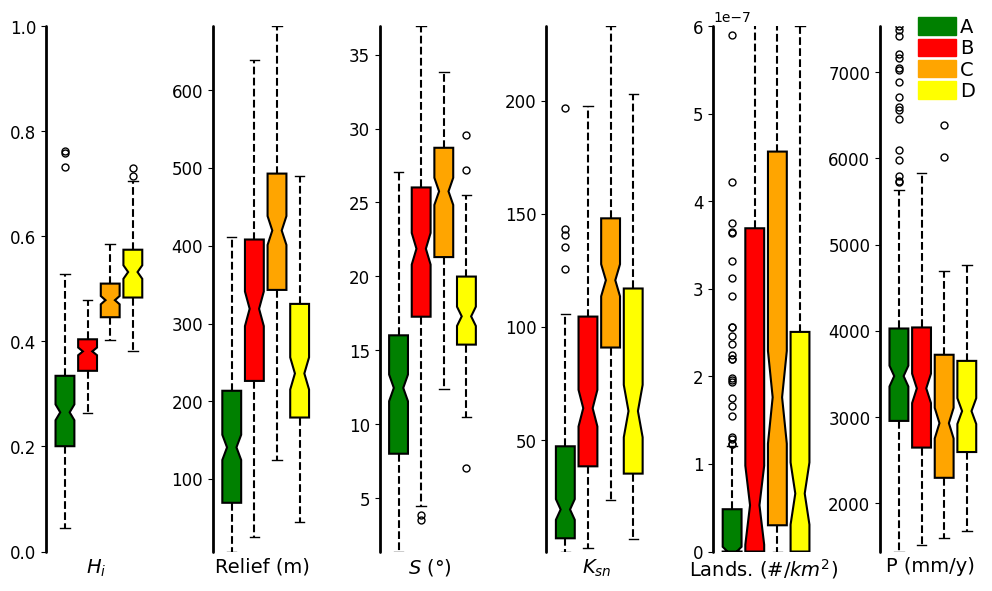

In [56]:
import matplotlib.patches as mpatches
f,ax=plt.subplots(1,6,figsize=(10,6))
#hypsometric Integral
bplot1=ax[0].boxplot([catA["hypso_inte"],catB["hypso_inte"],catC["hypso_inte"],catD["hypso_inte"]],
           vert=True,
           patch_artist = True,
           widths = 1,
           boxprops=dict(linewidth=1.5),
           showmeans=False,
           meanline=False,
           notch=True,
           whiskerprops = dict(linestyle = "dashed",linewidth=1.5),
           flierprops = dict(marker = "o", markersize = 5, markeredgecolor = "black"),
           medianprops= dict(linestyle = "solid", linewidth = 0),
           positions=[0.7,1.9,3.1,4.3],
           #labels=['Cluster A','B','C','D']
                   )

color=['green','red','orange','yellow']
for patch, color in zip(bplot1['boxes'], color):
    patch.set_facecolor(color)
ax[0].set_ylim(0,1)
ax[0].set_xlim(-0.3,5)
ax[0].set_xlabel('$H_i$', size=14,fontweight='bold')
ax[0].tick_params(labelsize = 12)
ax[0].set_yticks([0.0,0.2,0.4,0.6,0.8,1])
ax[0].set_xticks([])
ax[0].tick_params(axis="x",direction="in", pad=-24)
#ax.tick_params(axis='x', colors="red")
ax[0].spines['left'].set_capstyle('round')
ax[0].spines['left'].set_linewidth(2)
ax[0].spines['left'].set_color("black")
#ax[0].yaxis.set_ticks_position('none') 
ax[0].spines[['right', 'top','bottom']].set_visible(False)

#Local relief
bplot2=ax[1].boxplot([catA["rel_mean"],catB["rel_mean"],catC["rel_mean"],catD["rel_mean"]],
           vert=True,
           patch_artist = True,
           widths = 1,
           boxprops=dict(linewidth=1.5),
           showmeans=False,
           meanline=False,
           notch=True,
           whiskerprops = dict(linestyle = "dashed",linewidth=1.5),
           flierprops = dict(marker = "o", markersize = 5, markeredgecolor = "black"),
           medianprops= dict(linestyle = "solid", linewidth = 0),
           positions=[0.7,1.9,3.1,4.3],
           #labels=['A','B','C','D']
                   )

color=['green','red','orange','yellow']
for patch, color in zip(bplot2['boxes'], color):
    patch.set_facecolor(color)
ax[1].set_ylim(catA["rel_mean"].min(),catC["rel_mean"].max())
ax[1].set_xlim(-0.3,5)
ax[1].set_xlabel('Relief (m)', size=14)
ax[1].tick_params(labelsize = 12)
#ax[1].set_yticks([0.0,0.2,0.4,0.6,0.8,1])
ax[1].set_xticks([])
ax[1].tick_params(axis="x",direction="in", pad=-24)
#ax.tick_params(axis='x', colors="red")
ax[1].spines['left'].set_capstyle('round')
ax[1].spines['left'].set_linewidth(2)
ax[1].spines['left'].set_color("black")
#ax[0].yaxis.set_ticks_position('none') 
ax[1].spines[['right', 'top','bottom']].set_visible(False)

#mean slope
bplot3=ax[2].boxplot([catA["slope_mean"],catB["slope_mean"],catC["slope_mean"],catD["slope_mean"]],
           vert=True,
           patch_artist = True,
           widths = 1,
           boxprops=dict(linewidth=1.5),
           showmeans=False,
           meanline=False,
           notch=True,
           whiskerprops = dict(linestyle = "dashed",linewidth=1.5),
           flierprops = dict(marker = "o", markersize = 5, markeredgecolor = "black"),
           medianprops= dict(linestyle = "solid", linewidth = 0),
           positions=[0.7,1.9,3.1,4.3],
           #labels=['A','B','C','D']
                   )

color=['green','red','orange','yellow']
for patch, color in zip(bplot3['boxes'], color):
    patch.set_facecolor(color)
ax[2].set_ylim(catA["slope_mean"].min(),catB["slope_mean"].max())
ax[2].set_xlim(-0.3,5)
ax[2].set_xlabel('$S$ (°)', size=14)
ax[2].tick_params(labelsize = 12)
#ax[2].set_yticks([0.0,0.2,0.4,0.6,0.8,1])
ax[2].set_xticks([])
ax[2].tick_params(axis="x",direction="in", pad=-24)
#ax[2].tick_params(axis='x', colors="red")
ax[2].spines['left'].set_capstyle('round')
ax[2].spines['left'].set_linewidth(2)
ax[2].spines['left'].set_color("black")
#ax[2].yaxis.set_ticks_position('none') 
ax[2].spines[['right', 'top','bottom']].set_visible(False)

#"_Ksmean"
bplot4=ax[3].boxplot([catA["_Ksmean"],catB["_Ksmean"],catC["_Ksmean"],catD["_Ksmean"]],
           vert=True,
           patch_artist = True,
           widths = 1,
           boxprops=dict(linewidth=1.5),
           showmeans=False,
           meanline=False,
           notch=True,
           whiskerprops = dict(linestyle = "dashed",linewidth=1.5),
           flierprops = dict(marker = "o", markersize = 5, markeredgecolor = "black"),
           medianprops= dict(linestyle = "solid", linewidth = 0),
           positions=[0.7,1.9,3.1,4.3],
           #labels=['A','B','C','D']
                   )

color=['green','red','orange','yellow']
for patch, color in zip(bplot4['boxes'], color):
    patch.set_facecolor(color)
ax[3].set_ylim(catA["_Ksmean"].min(),catC["_Ksmean"].max())
ax[3].set_xlim(-0.3,5)
ax[3].set_xlabel('$K_{sn}$', size=14)
ax[3].tick_params(labelsize = 12)
#ax[3].set_yticks([0.0,0.2,0.4,0.6,0.8,1])
ax[3].set_xticks([])
ax[3].tick_params(axis="x",direction="in", pad=-24)
#ax[3].tick_params(axis='x', colors="red")
ax[3].spines['left'].set_capstyle('round')
ax[3].spines['left'].set_linewidth(2)
ax[3].spines['left'].set_color("black")
#ax[3].yaxis.set_ticks_position('none') 
ax[3].spines[['right', 'top','bottom']].set_visible(False)

#"landslide density"
bplot5=ax[4].boxplot([catA["lands_rec"]/catA["area"],catB["lands_rec"]/catB["area"],catC["lands_rec"]/catC["area"],catD["lands_rec"]/catD["area"]],
           vert=True,
           patch_artist = True,
           widths = 1,
           boxprops=dict(linewidth=1.5),
           showmeans=False,
           meanline=False,
           notch=True,
           whiskerprops = dict(linestyle = "dashed",linewidth=1.5),
           flierprops = dict(marker = "o", markersize = 5, markeredgecolor = "black"),
           medianprops= dict(linestyle = "solid", linewidth = 0),
           positions=[0.7,1.9,3.1,4.3],
           #labels=['A','B','C','D']
                   )

color=['green','red','orange','yellow']
for patch, color in zip(bplot5['boxes'], color):
    patch.set_facecolor(color)
ax[4].set_ylim(0,0.6e-6)
ax[4].set_xlim(-0.3,5)
ax[4].set_xlabel('Lands. (#/$km^2$)', size=14)
ax[4].tick_params(labelsize = 12)
#ax[4].set_yticks([0.0,0.2,0.4,0.6,0.8,1])
ax[4].set_xticks([])
ax[4].tick_params(axis="x",direction="in", pad=-24)
#ax[4].tick_params(axis='x', colors="red")
ax[4].spines['left'].set_capstyle('round')
ax[4].spines['left'].set_linewidth(2)
ax[4].spines['left'].set_color("black")
#ax[4].yaxis.set_ticks_position('none') 
ax[4].spines[['right', 'top','bottom']].set_visible(False)

#"rainfall"
bplot6=ax[5].boxplot([catA["rainfall_cat"],catB["rainfall_cat"],catC["rainfall_cat"],catD["rainfall_cat"]],
           vert=True,
           patch_artist = True,
           widths = 1,
           boxprops=dict(linewidth=1.5),
           showmeans=False,
           meanline=False,
           notch=True,
           whiskerprops = dict(linestyle = "dashed",linewidth=1.5),
           flierprops = dict(marker = "o", markersize = 5, markeredgecolor = "black"),
           medianprops= dict(linestyle = "solid", linewidth = 0),
           positions=[0.7,1.9,3.1,4.3],
           #labels=['A','B','C','D']
                   )

color=['green','red','orange','yellow']
for patch, color in zip(bplot6['boxes'], color):
    patch.set_facecolor(color)
ax[5].set_ylim(catA["rainfall_cat"].min(),catA["rainfall_cat"].max())
ax[5].set_xlim(-0.3,5)
ax[5].set_xlabel('P (mm/y)', size=14)
ax[5].tick_params(labelsize = 12)
#ax[5].set_yticks([0.0,0.2,0.4,0.6,0.8,1])
ax[5].set_xticks([])
ax[5].tick_params(axis="x",direction="in", pad=-24)
#ax[5].tick_params(axis='x', colors="red")
ax[5].spines['left'].set_capstyle('round')
ax[5].spines['left'].set_linewidth(2)
ax[5].spines['left'].set_color("black")
#ax[5].yaxis.set_ticks_position('none') 
ax[5].spines[['right', 'top','bottom']].set_visible(False)

ax[5].legend([bplot1["boxes"][0], bplot2["boxes"][0],bplot3["boxes"][0],bplot4["boxes"][0]], ['A', 'B','C','D'], loc='upper left')

A = mpatches.Patch(color='green', label='A')
B = mpatches.Patch(color='red', label='B')
C = mpatches.Patch(color='orange', label='C')
D = mpatches.Patch(color='yellow', label='D')
ax[5].legend(handles=[A, B, C, D], loc='upper left', bbox_to_anchor=(0.2, 1.05), frameon=False, fontsize=14, handleheight=1,  handletextpad=0.2,labelspacing=0.1)

f.tight_layout() 
plt.savefig("../Rev1/Figuras/Fig8.png", dpi=500)